In [1]:
library(tidyverse)
library(repr)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
# download zip file
zipFileUrl <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
temp <- tempfile()
download.file(zipFileUrl, temp)
rawData <- read.csv(unz(temp, "hour.csv"))
unlink(temp)
# above code consult: https://stackoverflow.com/questions/3053833/using-r-to-download-zipped-data-file-extract-and-import-data

BikeSharingData <- rawData %>%
    group_by(dteday) %>%
    summarize(cnt = sum(cnt), workingday=mean(workingday)) %>%
    ungroup() %>%
    select(workingday, cnt) %>%
    mutate(isworkingday = (workingday == 1)) %>%
    mutate(isworkingday = as.factor(isworkingday)) %>%
    rep_sample_n(size = 70) %>%
    ungroup() %>%
    select(isworkingday, cnt)
all_BikeSharingData <- BikeSharingData %>% select(cnt)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


Warning message:
“Removed 4 rows containing missing values (geom_bar).”


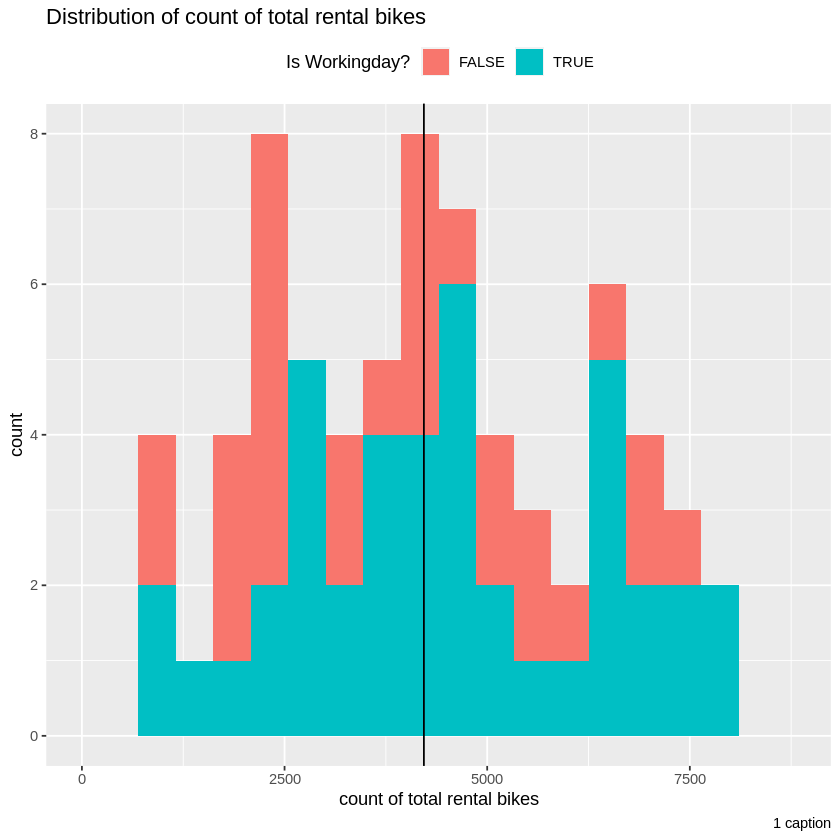

In [12]:
all_BikeSharingData_hist <- ggplot(BikeSharingData, 
                                   aes(x = cnt, fill = isworkingday)) +
  geom_histogram(bins=20) +
  labs(x="count of total rental bikes", fill="Is Workingday?") +
  ggtitle("Distribution of count of total rental bikes") +
  geom_vline(xintercept = mean(BikeSharingData$cnt)) +
  theme(legend.position="top") +
  xlim(0, 8800) +
labs(caption = "1 caption")
  
all_BikeSharingData_hist


In [8]:
txtSize = 15

Warning message:
“Removed 4 rows containing missing values (geom_bar).”


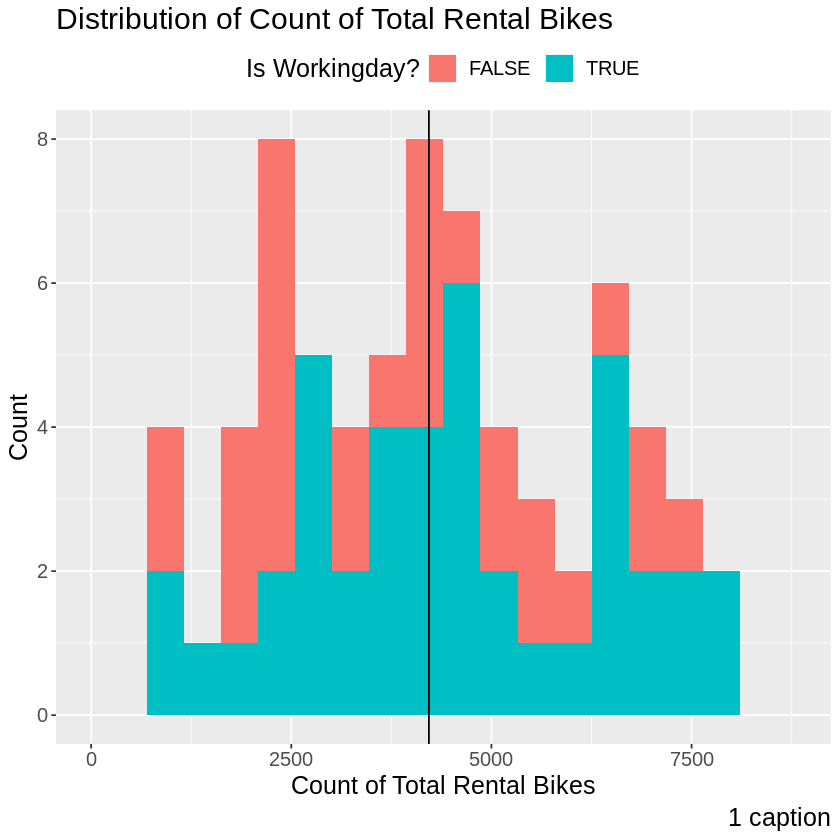

In [17]:
standardize <- function(g, textSize = txtSize) {
    g <- g + labs(x=tools::toTitleCase(g$labels$x), 
            y = tools::toTitleCase(g$labels$y), 
            title = tools::toTitleCase(g$labels$title)) +
    theme(text = element_text(size = textSize), 
          plot.caption = element_text(size = textSize, hjust = T))
    return (g)
}

standardize(all_BikeSharingData_hist)

Warning message:
“Removed 4 rows containing missing values (geom_bar).”


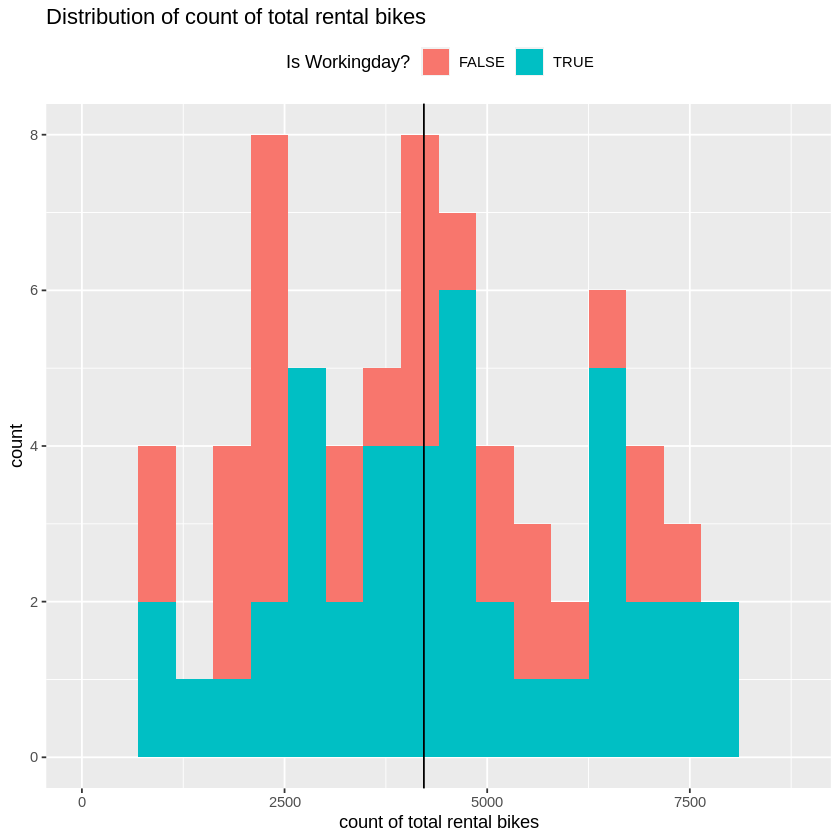

In [11]:
all_BikeSharingData_hist